# Лабораторная работа №3
Датасет: результаты студентов на экзаменах по математике

In [172]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import datetime as dt
import sys

In [173]:
file_name = 'data1.csv'
file_path = f'{Path(os.getcwd()).parent}//data//{file_name}'
data = pd.read_csv(file_path, delimiter=',')

print(data)

     gender race/ethnicity parental level of education         lunch   
0    female        group D                some college      standard  \
1      male        group D          associate's degree      standard   
2    female        group D                some college  free/reduced   
3      male        group B                some college  free/reduced   
4    female        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          59             70         

## Задание 1
Масштабирование признаков (не менее чем тремя способами);

Удаление нечисловых параметров

In [174]:
X_ALL = data.copy()
X_ALL = X_ALL.drop('lunch', axis=1)
X_ALL = X_ALL.drop('parental level of education', axis=1)
X_ALL = X_ALL.drop('race/ethnicity', axis=1)
X_ALL = X_ALL.drop('gender', axis=1)
X_ALL = X_ALL.drop('test preparation course', axis=1)
X_ALL

,math score,reading score,writing score
0,59,70,78
1,96,93,87
2,57,76,77
3,70,70,63
4,83,85,86
...,...,...,...
995,77,77,71
996,80,66,66
997,67,86,86
998,80,72,62


In [175]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled)
    return res

Масштабирование данных на основе Z-оценки

In [176]:
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,0,1,2
0,-0.577987,-0.027092,0.589943
1,1.849426,1.604073,1.189208
2,-0.709198,0.398430,0.523358
3,0.143677,-0.027092,-0.408832
4,0.996551,1.036711,1.122623
...,...,...,...
995,0.602917,0.469350,0.123848
996,0.799734,-0.310772,-0.209077
997,-0.053141,1.107632,1.122623
998,0.799734,0.114749,-0.475417


Масштабирование "Mean Normalisation"

In [177]:
class MeanNormalisation:
    def fit(self, col, param_df):
        self.means = col.mean(axis=0)
        maxs = col.max(axis=0)
        mins = col.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, col, param_df):
        self.fit(col, param_df)
        return self.transform(param_df)

In [178]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(data['math score'], X_ALL)
data_cs21_scaled.describe()

,math score,reading score,writing score
count,1.000000e+03,1000.000000,1000.000000
mean,-2.664535e-17,0.030259,0.015647
std,1.794141e-01,0.165970,0.176775
min,-6.212941e-01,-0.503647,-0.621294
25%,-1.154118e-01,-0.080118,-0.103647
50%,2.235294e-03,0.031647,0.025765
75%,1.345882e-01,0.143412,0.143412
max,3.787059e-01,0.378706,0.378706


MinMax-масштабирование

In [179]:
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,0.621294,0.605093,0.636941
std,0.179414,0.188099,0.176775
min,0.000000,0.000000,0.000000
25%,0.505882,0.480000,0.517647
50%,0.623529,0.606667,0.647059
75%,0.755882,0.733333,0.764706
max,1.000000,1.000000,1.000000


## Задание 2
Обработку выбросов для числовых признаков (по одному способу для удаления выбросов и для замены выбросов);

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f661c488940>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f661c5dfc10>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f661c489270>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f661c489600>}

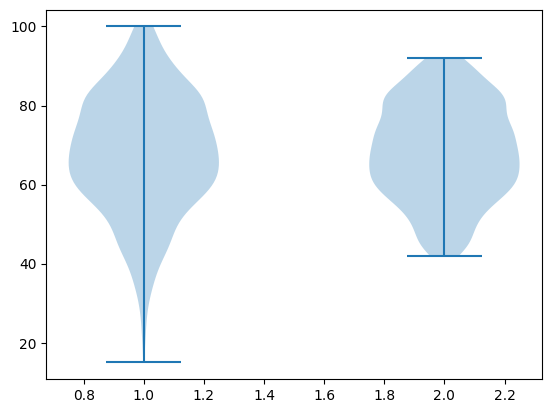

In [180]:
quantile_05 = data["math score"].quantile(0.05)
quantile_95 = data["math score"].quantile(0.95)

outliers_temp = np.where(data["math score"] < quantile_05, True, 
                np.where(data["math score"] > quantile_95, True, False)
                )
data_trimmed = data["math score"].loc[~(outliers_temp)]  
        
plt.violinplot([data["math score"],
                data_trimmed,
                ])

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f661c7f17b0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f661c446320>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f661c4efdc0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f661c518190>}

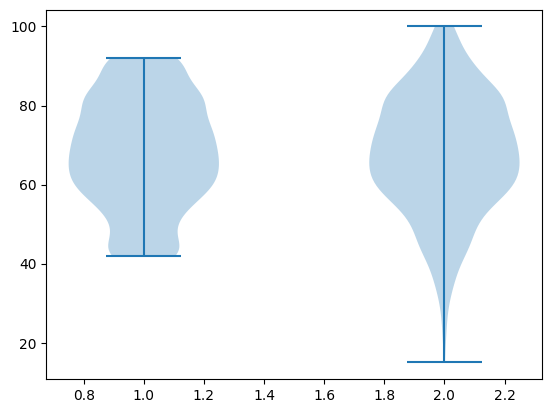

In [181]:
quantile_05 = data["math score"].quantile(0.05)
quantile_95 = data["math score"].quantile(0.95)

math_score_old = data["math score"]
data["math score"] = np.where(data["math score"] > quantile_95, quantile_95, 
                     np.where(data["math score"] < quantile_05, quantile_05, data["math score"]))
        
plt.violinplot([data["math score"],
                math_score_old,
                ])

## Задание 3
Обработку по крайней мере одного нестандартного признака (который не является числовым или категориальным);

In [182]:
X_ALL['date'] = '05.06.2023'

X_ALL['date'] = pd.to_datetime(X_ALL['date']).map(dt.datetime.toordinal)

print(X_ALL['date'])
X_ALL = X_ALL.drop('date', axis=1)

0      738646
1      738646
2      738646
3      738646
4      738646
        ...  
995    738646
996    738646
997    738646
998    738646
999    738646
Name: date, Length: 1000, dtype: int64


## Задание 4
Отбор признаков:
    один метод из группы методов фильтрации (filter methods);
    один метод из группы методов обертывания (wrapper methods);
    один метод из группы методов вложений (embedded methods).


In [183]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
import seaborn as sns

<Axes: >

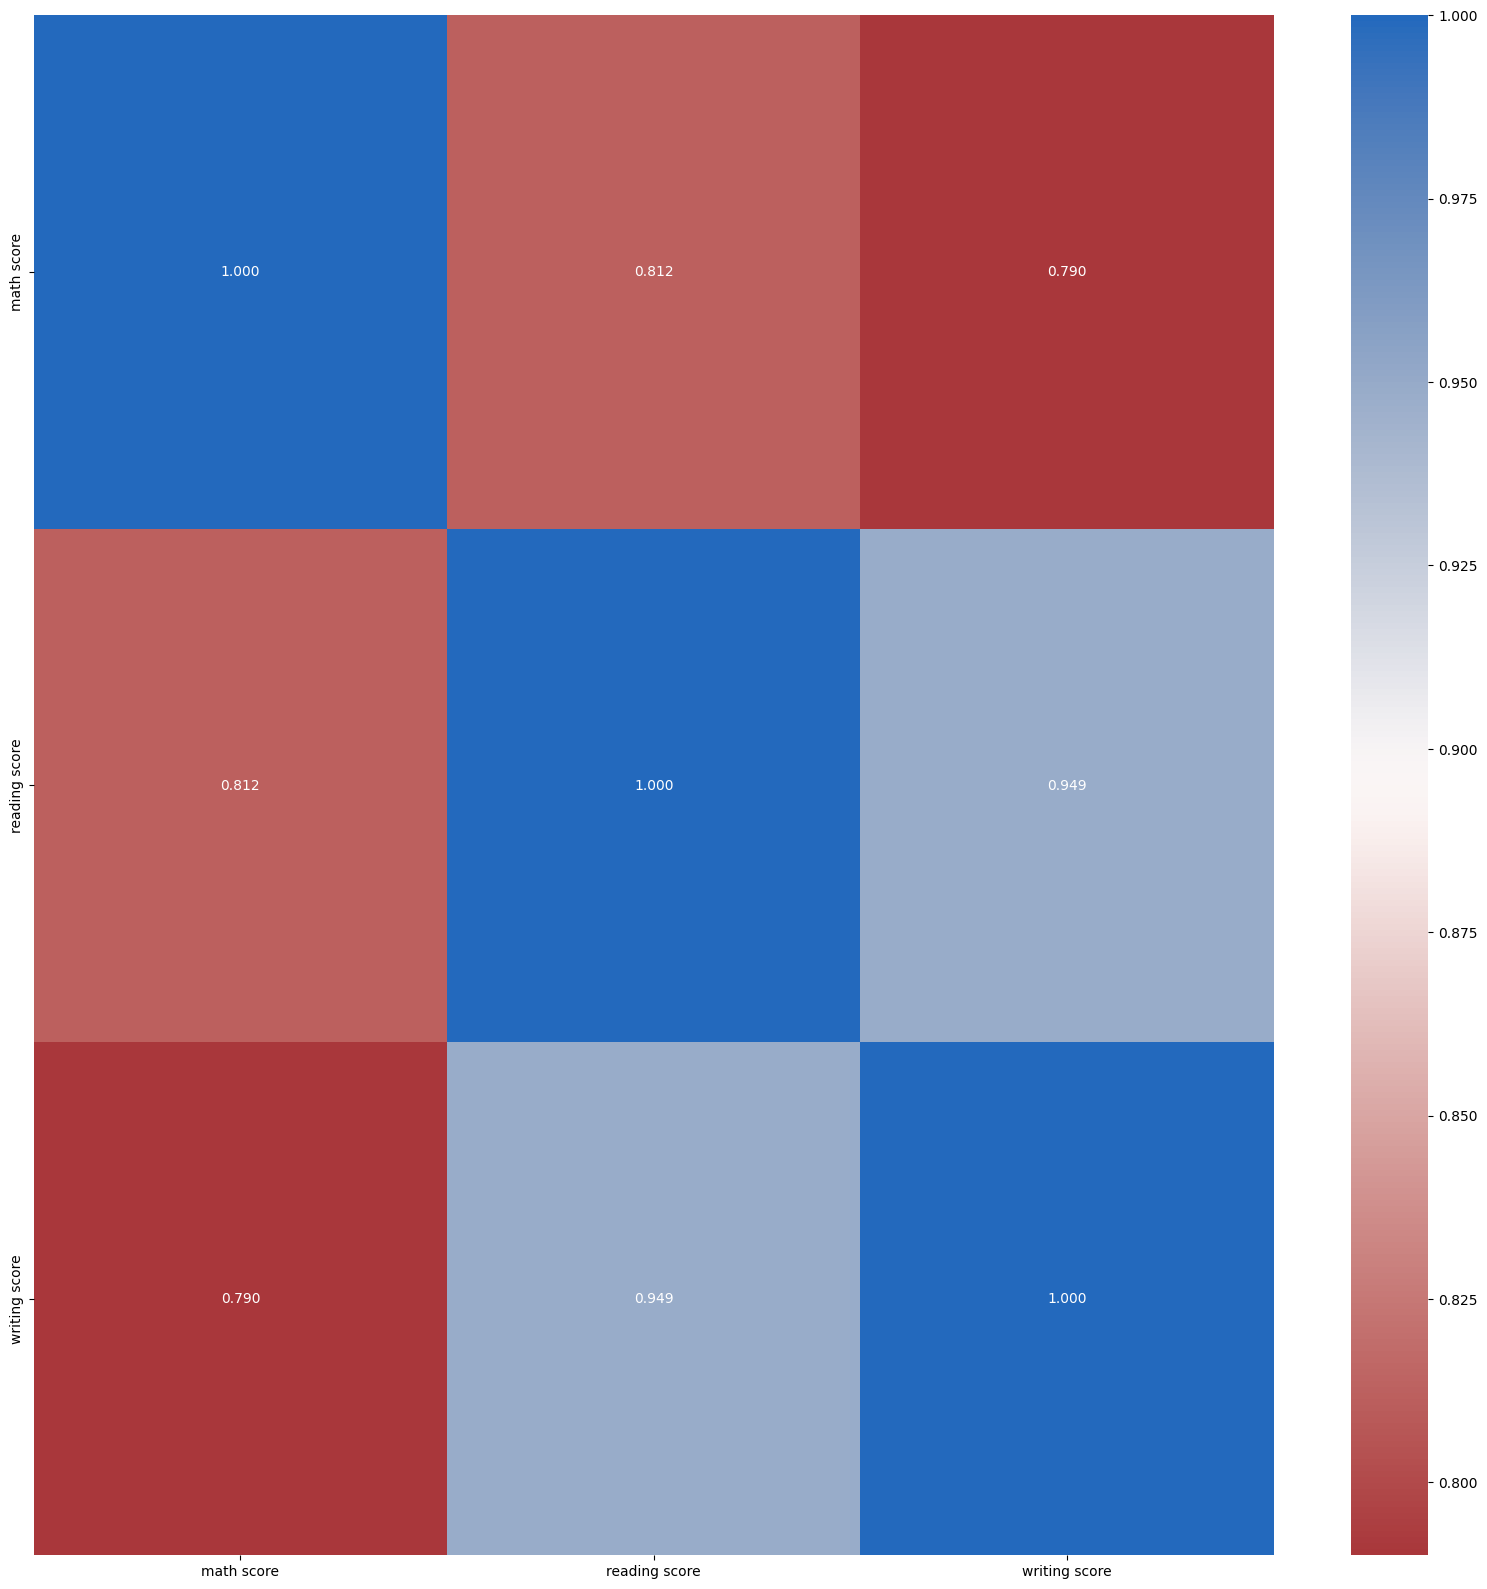

In [184]:
np.set_printoptions(threshold=sys.maxsize)

corrmat = X_ALL.corr()    
plt.figure(figsize=(20,20))
sns.heatmap(corrmat, annot=True, fmt='.3f', cmap="vlag_r")

In [185]:
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [ ]:
corr_groups(make_corr_df(X_ALL))

In [ ]:
data_y = data['RainTomorrow']
data_X = data.drop(['RainTomorrow'], axis = 1)

In [ ]:
data = data.drop(['MaxTemp'], axis = 1)
data = data.drop(['Temp9am'], axis = 1)
data = data.drop(['Pressure3pm'], axis = 1)

Статистические характеристики

In [ ]:
mi = mutual_info_regression(data_X, data_y)
mi = pd.Series(mi)
mi.index = data_X.columns
mi.sort_values(ascending=False).plot.bar(figsize=(20,5))
plt.ylabel('Взаимная информация')

In [ ]:
sel_mi = SelectKBest(mutual_info_regression, k=15).fit(data_X, data_y)

In [ ]:
data_filter = data_X[ data_X.columns[ sel_mi.get_support() ] ]
data_filter

In [ ]:
data = data_filter

In [ ]:


f = ['Location','Sunshine','Humidity3pm', 'Rainfall','Pressure3pm']



In [ ]:


from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)



In [ ]:


efs1 = EFS(knn, 
           min_features=2,
           max_features=4,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs1 = efs1.fit(data_X[f], data_y)

print('Best accuracy score: %.2f' % efs1.best_score_)
print('Best subset (indices):', efs1.best_idx_)
print('Best subset (corresponding names):', efs1.best_feature_names_)



In [ ]:
efs2 = EFS(knn, 
           min_features=1,
           max_features=2,
           scoring='accuracy',
           print_progress=True,
           cv=5)

efs2 = efs2.fit(data_X[f], data_y)

print('Best accuracy score: %.2f' % efs2.best_score_)
print('Best subset (indices):', efs2.best_idx_)
print('Best subset (corresponding names):', efs2.best_feature_names_)

In [ ]:


from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, title, figsize=(7,4)):
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    labels = [x for x,_ in sorted_list]
    data = [x for _,x in sorted_list]
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(title)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    for a,b in zip(ind, data):
        plt.text(a-0.1, b+0.005, str(round(b,3)))
    plt.show()
    return labels, data



In [ ]:


from sklearn.ensemble import RandomForestClassifier

rfc1 = RandomForestClassifier()
rfc1.fit(data_X, data_y)

rfc1.feature_importances_, sum(rfc1.feature_importances_)



In [ ]:
_,_=draw_feature_importances(rfc1, data, 'Важность признаков в случайном лесе')

In [ ]:
filter_index = data_X.columns[ SelectFromModel(rfc1, threshold='0.1*mean').fit(data_X, data_y).get_support() ]

In [ ]:


data_filter = data_X[filter_index]
data_filter

